## Intragración sobre la función de correlación
## Implementación en Python 
### José Alberto Moreno Guerra

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import scipy.stats as st
from random import random
import matplotlib.pyplot as plt
import math 
from IPython.display import display
from IPython.core.pylabtools import figsize, getfigs
plt.style.use('classic')
%matplotlib inline

### Generamos varias distribuciones de puntos, una aleatoria 

In [2]:
global vtx, vty
vtx = []
vty = []
def anillos(R,r,n,i):
    tcx=np.zeros(n)
    tcy=np.zeros(n)
    tcz=np.zeros(n)
    np.random.seed(i)
    centro1=(random()-0.5)*1000.0
    centro2=(random()-0.5)*1000.0
    for i in range(n):
        alpha=np.random.uniform(0, 2.*np.pi)
        beta=np.random.uniform(0, 2.*np.pi)
        x2=(R+r*math.cos(alpha))*math.cos(beta)-centro1
        y2=(R+r*math.cos(alpha))*math.sin(beta)-centro2
        z2=r*math.sin(alpha)
        #check=math.sqrt(x1*x1+y1*y1)
        #if(check<=(R+r*math.cos(alpha))):
        tcx[i]=x2
        tcy[i]=y2
        vtx.append(tcx[i])
        vty.append(tcy[i])
        tcz[i]=z2
    plt.plot(tcx,tcy, 'b.')
    circle = plt.Circle((-centro1, -centro2), (R-r)-10.0, color='r', fill=False)
    plt.gcf().gca().add_artist(circle)
    circle = plt.Circle((-centro1, -centro2), (R+r)+10.0, color='r', fill=False)
    plt.gcf().gca().add_artist(circle)

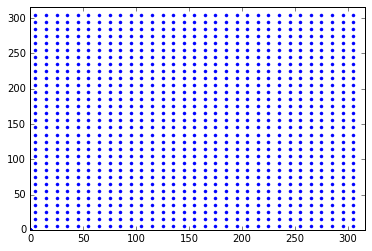

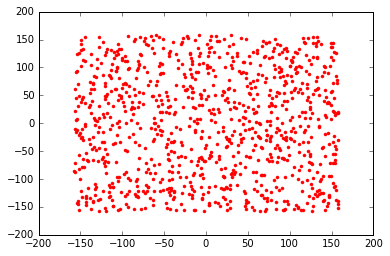

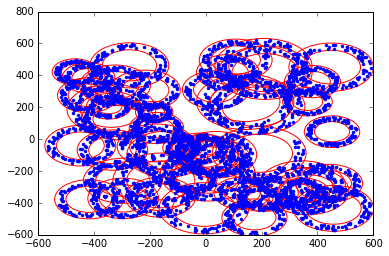

In [3]:
# Malla
n=1000
rho=0.01
dim=np.sqrt(n/rho)
d=dim/np.sqrt(n)
x=np.zeros(n)
y=np.zeros(n)
radx=[]
rady=[]
k=0
for i in range(int(dim/d)):
    for j in range(int(dim/d)):   
        x[k]=(d/2)+d*i
        y[k]=(d/2)+d*j
        k=k+1
for i in range(n):
    radx.append((random()-0.5)*dim)
    rady.append((random()-0.5)*dim)
plt.plot(x,y, 'b.')
plt.axis([0.0, dim, 0.0, dim]) 
plt.show()
plt.plot(radx,rady, 'r.')
plt.show()

# Distribución de anillos
for i in range(50):
    np.random.seed(i)
    z=(1-(random()-0.5))*100
    c=z/10.0
    anillos(z,c,100,i)
plt.figure(figsize=(15,15))
plt.show()

### Estimador de Hamilton 

$\zeta (r)=\frac{DD(r)-RR(r)}{DR(r)^{2}}$

In [4]:
def hamilton(x,y,xrand,yrand,dim,t_bins):
    global xfh, errh
    n = np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    ran = dmax/t_bins
    bins=np.linspace(0.0,dmax,t_bins)
    rdist = []
    drand = []
    DR = []
    gr = np.zeros(t_bins)
    grand = np.zeros(t_bins)
    grd = np.zeros(t_bins)
    
    errh = np.zeros(t_bins)
    for i in range(n):
        for j in range(i+1,n-1):
            r_dr = math.sqrt(((x[i]-xrand[j])**2)+(y[i]-yrand[j])**2)
            r = math.sqrt(((x[i]-x[j])**2)+(y[i]-y[j])**2)
            r_rand = math.sqrt(((xrand[i]-xrand[j])**2)+(yrand[i]-yrand[j])**2)
            rdist.append(r)
            drand.append(r_rand)
            DR.append(r_dr)
    for i in range(t_bins):
        for j in range(n):
            r = np.uint32((rdist[j])/ran)
            r_rand = np.uint32((drand[j])/ran)
            r_dr = np.uint32((DR[j])/ran)
            if(r<dmax):
                if(r<t_bins):
                    gr[int(r)]=gr[int(r)]+1
            if(r_rand<dmax):
                if(r_rand<t_bins):
                    grand[int(r_rand)]=grand[int(r_rand)]+1
            if(r_dr<dmax):
                if(r_dr<t_bins):
                    grd[int(r_dr)]=grd[int(r_dr)]+1
    for i in range(t_bins):
        if(grd[i]!=0):
            errh[i]=(abs(gr[i]-grand[i])/(grd[i]**2.))
    xfh=np.linspace(0,dmax,np.size(errh))
#    plt.plot(xfh,errh/np.max(errh),'o-', label='Hamilton')
#    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
#    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y

### Estimador de Peebles-Hauser

$\zeta (r)=\left ( \frac{r_{o}}{r} \right )^{\gamma }$ with $\gamma = 1.77$ and $r_{o}^{\gamma}=5.4$

In [5]:
def PHauser(x,y,dim,t_bins):
    global xfph, errph
    n = np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    ran = dmax/t_bins
    bins=np.linspace(0.0,dmax,t_bins)
    rdist = []
    gr = np.zeros(t_bins)
    
    errph = np.zeros(t_bins)
    for i in range(n):
        for j in range(i+1,n-1):
            r = math.sqrt(((x[i]-x[j])**2)+(y[i]-y[j])**2)
            rdist.append(r)
    for i in range(t_bins):
        for j in range(n):
            r = np.uint32((rdist[j])/ran)
            if(r<dmax):
                if(r<t_bins):
                    gr[int(r)]=gr[int(r)]+1
    for i in range(t_bins):
        if(gr[i]!=0):
            errph[i] = np.max(gr)*(5.4/(gr[i]))**1.66
    xfph=np.linspace(0,dmax,np.size(errph))
#    plt.plot(xfph,errph/np.max(errph),'o-', label='Peebles-Hauser')
#    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
#    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y

### De Davis-Peebles

$\zeta (r)=\frac{N_{rd}}{N}\frac{DD(r)}{DR(r)}-1$

In [6]:
def DPeebles(x,y,xrand,yrand,dim,t_bins):
    global xfdp, errdp
    nrd = np.size(xrand)
    n = np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    ran = dmax/t_bins
    bins=np.linspace(0.0,dmax,t_bins)
    rdist = []
    DR = []
    gr = np.zeros(t_bins)
    grand = np.zeros(t_bins)
    grd = np.zeros(t_bins)
    
    errdp = np.zeros(t_bins)
    for i in range(n):
        for j in range(i+1,n-1):
            r_dr = math.sqrt(((x[i]-xrand[j])**2)+(y[i]-yrand[j])**2)
            r = math.sqrt(((x[i]-x[j])**2)+(y[i]-y[j])**2)
            r_rand = math.sqrt(((xrand[i]-xrand[j])**2)+(yrand[i]-yrand[j])**2)
            rdist.append(r)
            DR.append(r_dr)
    for i in range(t_bins):
        for j in range(n):
            r = np.uint32((rdist[j])/ran)
            r_dr = np.uint32((DR[j])/ran)
            if(r<dmax):
                if(r<t_bins):
                    gr[int(r)]=gr[int(r)]+1
            if(r_dr<dmax):
                if(r_dr<t_bins):
                    grd[int(r_dr)]=grd[int(r_dr)]+1
    for i in range(t_bins):
        if(grd[i]!=0):
            errdp[i]=(nrd/n)*(gr[i]/grd[i])-1
    xfdp=np.linspace(0,dmax,np.size(errdp))
#    plt.plot(xfdp,errdp/np.max(errdp),'o-', label='Davis-Peebles')
#    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
#    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y

### Estimador de Landy-Szalay 

$\zeta (r)=1+\left ( \frac{N_{rd}}{N} \right )^{2}\frac{DD(r)}{RR(r)}-2\frac{N_{rd}}{N}\frac{DR(r)}{RR(r)}$

In [7]:
def LSzalay(x,y,xrand,yrand,dim,t_bins):
    global xfls, errls
    nrd = np.size(xrand)
    n = np.size(x)
    dmax = math.sqrt(2.0*(dim**2))
    ran = dmax/t_bins
    bins=np.linspace(0.0,dmax,t_bins)
    rdist = []
    drand = []
    DR = []
    gr = np.zeros(t_bins)
    grand = np.zeros(t_bins)
    grd = np.zeros(t_bins)
    
    errls = np.zeros(t_bins)
    for i in range(n):
        for j in range(i+1,n-1):
            r_dr = math.sqrt(((x[i]-xrand[j])**2)+(y[i]-yrand[j])**2)
            r = math.sqrt(((x[i]-x[j])**2)+(y[i]-y[j])**2)
            r_rand = math.sqrt(((xrand[i]-xrand[j])**2)+(yrand[i]-yrand[j])**2)
            rdist.append(r)
            drand.append(r_rand)
            DR.append(r_dr)
    for i in range(t_bins):
        for j in range(n):
            r = np.uint32((rdist[j])/ran)
            r_rand = np.uint32((drand[j])/ran)
            r_dr = np.uint32((DR[j])/ran)
            if(r<dmax):
                if(r<t_bins):
                    gr[int(r)]=gr[int(r)]+1
            if(r_rand<dmax):
                if(r_rand<t_bins):
                    grand[int(r_rand)]=grand[int(r_rand)]+1
            if(r_dr<dmax):
                if(r_dr<t_bins):
                    grd[int(r_dr)]=grd[int(r_dr)]+1
    for i in range(t_bins):
        if(grand[i]!=0):
            errls[i]=(1+(((nrd/n)**2.)*(gr[i]/grand[i]))-2*(nrd/n)*(grd[i]/grand[i]))
    xfls=np.linspace(0,dmax,np.size(errls))
#    plt.plot(xfls,errls/np.max(errls),'o-', label='Landy-Szalay')
#    plt.xlabel("$r$",fontsize = 20)   # Establece el título del eje x
#    plt.ylabel("$\zeta (r)$",fontsize = 20)   # Establece el título del eje y

In [8]:
def riemannplot(f, a, b, ra, rb, n):
    # f es la función 
    # a y b son los limites del eje x para graficar la funcion f
    # ra y rb son los limites del intervalo en el eje x del que queremos calcular la suma
    # n es el numero de rectangulos que calcularemos

    atenuacion = (b-a)/100
    x = np.arange(a, b+atenuacion, atenuacion)
    plt.plot(x, f(x), color='green')

    delta_x = (rb-ra)/n
    riemannx = np.arange(ra, rb, delta_x)
    riemanny = f(riemannx)
    riemann_sum = sum(riemanny*delta_x)

    plt.bar(riemannx,riemanny,width=delta_x,alpha=0.5,facecolor='orange')
    plt.xlabel('$r$')
    plt.ylabel('$\zeta (r)$')
    plt.figtext(0.1,0.02, "Suma de Riemann: " + str(riemann_sum), color='r')
    plt.show()

## Funcion de correlación para la Malla con diferentes estimadores

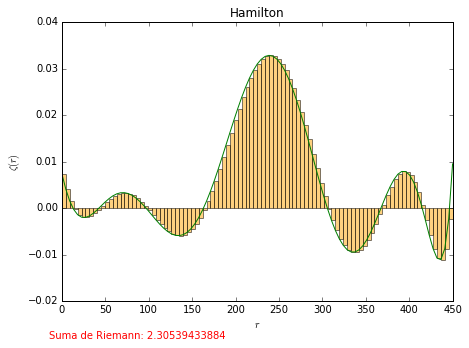

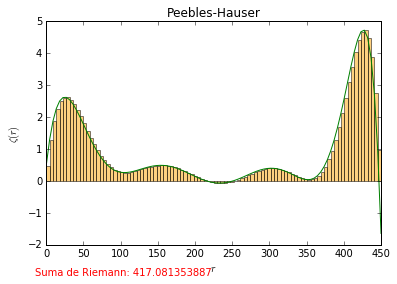

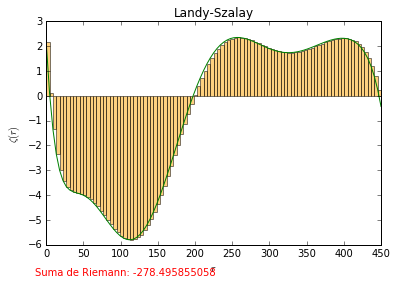

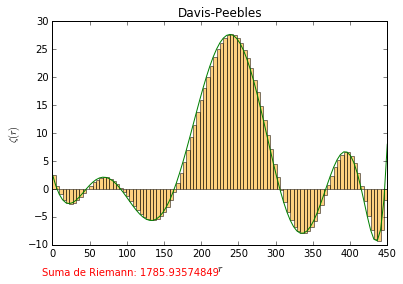

In [9]:
a = 0.0
b = 450.0
ra = a
rb = b

# A cada función de correlación se le ajusta un polinomio de orden 9 

plt.figure(figsize=(7,5))
hamilton(x,y,radx,rady,dim,20)
aj_hm = np.polyfit(xfh, errh, 9)
fc_hm = np.poly1d(aj_hm)
plt.title('Hamilton')
riemannplot(fc_hm, a, b, ra, rb, 100)

PHauser(x,y,dim,20)
aj_phm = np.polyfit(xfph, errph, 9)
fc_phm = np.poly1d(aj_phm)
plt.title('Peebles-Hauser')
riemannplot(fc_phm, a, b, ra, rb, 100)

LSzalay(x,y,radx,rady,dim,20)
aj_lsm = np.polyfit(xfls, errls, 9)
fc_lsm = np.poly1d(aj_lsm)
plt.title('Landy-Szalay')
riemannplot(fc_lsm, a, b, ra, rb, 100)

DPeebles(x,y,radx,rady,dim,20)
aj_dpm = np.polyfit(xfdp, errdp, 9)
fc_dpm = np.poly1d(aj_dpm)
plt.title('Davis-Peebles')
riemannplot(fc_dpm, a, b, ra, rb, 100)

#plt.axis([0.0,450.0 , -1.5, 3.5]) 
#plt.legend()
#plt.show()

## Funcion de correlación para los 50 anillos con diferentes estimadores

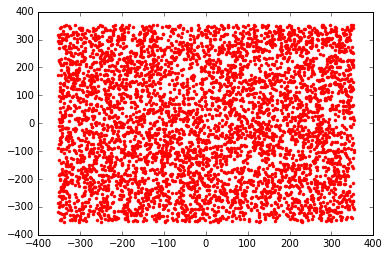

In [10]:
n=np.size(vtx)
rho=0.01
dim=np.sqrt(n/rho)
d=dim/np.sqrt(n)
radx=[]
rady=[]
for i in range(n):
    radx.append((random()-0.5)*dim)
    rady.append((random()-0.5)*dim)
plt.plot(radx,rady, 'r.')
plt.show()

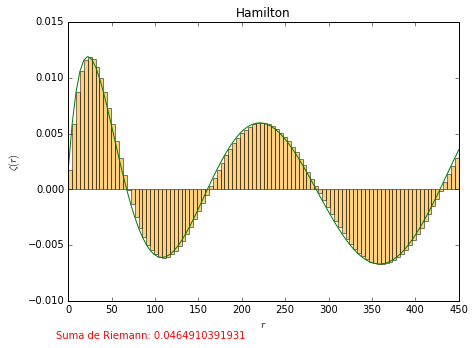

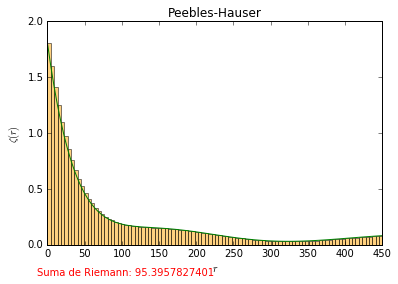

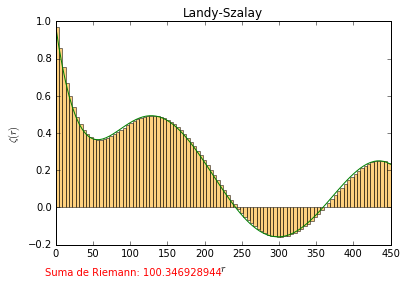

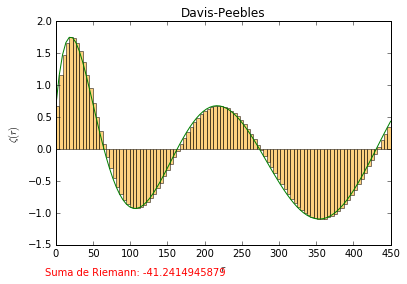

In [11]:
plt.figure(figsize=(7,5))
hamilton(vtx,vty,radx,rady,dim,20)
aj_ha = np.polyfit(xfh, errh, 9)
fc_ha = np.poly1d(aj_ha)
plt.title('Hamilton')
riemannplot(fc_ha, a, b, ra, rb, 100)

PHauser(vtx,vty,dim,20)
aj_pha = np.polyfit(xfph, errph, 9)
fc_pha = np.poly1d(aj_pha)
plt.title('Peebles-Hauser')
riemannplot(fc_pha, a, b, ra, rb, 100)

LSzalay(vtx,vty,radx,rady,dim,20)
aj_lsa = np.polyfit(xfls, errls, 9)
fc_lsa = np.poly1d(aj_lsa)
plt.title('Landy-Szalay')
riemannplot(fc_lsa, a, b, ra, rb, 100)

DPeebles(vtx,vty,radx,rady,dim,20)
aj_dpa = np.polyfit(xfdp, errdp, 9)
fc_dpa = np.poly1d(aj_dpa)
plt.title('Davis-Peebles')
riemannplot(fc_dpa, a, b, ra, rb, 100)

#plt.axis([0.0,450.0 , -1.5, 3.5]) 
#plt.legend()
#plt.show()